For predicting future groundwater levels, we can use Time Series Forecasting with ARIMA (AutoRegressive Integrated Moving Average) or LSTM (Long Short-Term Memory) models. Below is the starter code using ARIMA, which is suitable for short-term forecasting with monthly data.

# Objective: Forecast future groundwater levels under different scenarios.
## Method:
Use linear regression, ARIMA, or machine learning models (e.g., LSTM) to predict levels based on historical trends and rainfall.
Insights:
Provide actionable predictions for water resource planning and mitigation during El Niño years.


In [14]:
# !python -m pip install statsmodels
# import sys
# print(sys.executable)
# !{sys.executable} -m pip install statsmodels
# !pip show statsmodels


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler


In [19]:
# Load the dataset
file_path = "chennai-ground-water-levels-2023.csv"  # Replace with your file path
df = pd.read_csv(file_path)

In [21]:
# Columns for groundwater levels
months = ["Jan ", "Feb", "Mar", "Apr ", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
df_filtered = df[["Location"] + months]

In [22]:
# Convert monthly values to numeric
df_filtered[months] = df_filtered[months].apply(pd.to_numeric, errors='coerce')

C:\Users\rumma\AppData\Local\Temp\ipykernel_11504\829383978.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[months] = df_filtered[months].apply(pd.to_numeric, errors='coerce')


In [24]:
# Select a specific location for forecasting (e.g., Kathivakkam)
location = "Kathivakkam"
df_location = df_filtered[df_filtered["Location"] == location].iloc[:, 1:].mean().to_frame()  # Take mean if multiple rows exist
df_location.columns = ["Groundwater Level"]  # Rename column
df_location.index = pd.date_range(start="2023-01", periods=12, freq="M")  # Create time index


C:\Users\rumma\AppData\Local\Temp\ipykernel_11504\3588927907.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_location.index = pd.date_range(start="2023-01", periods=12, freq="M")  # Create time index


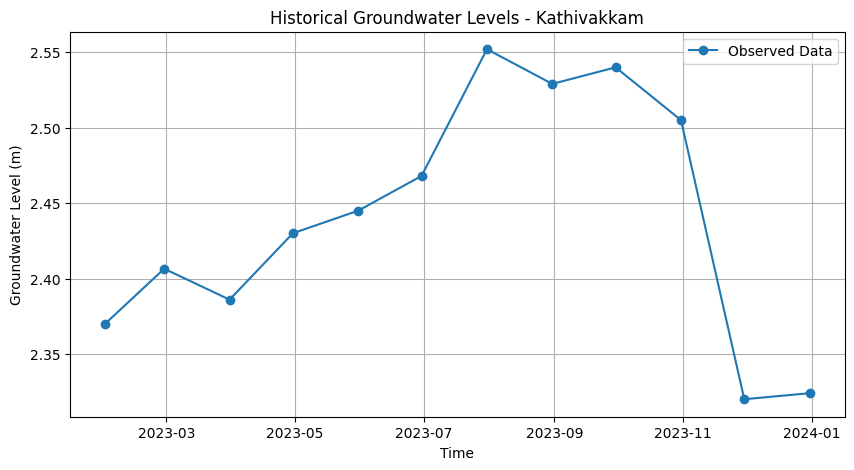

In [25]:
# Plot historical groundwater levels
plt.figure(figsize=(10, 5))
plt.plot(df_location, marker="o", label="Observed Data")
plt.xlabel("Time")
plt.ylabel("Groundwater Level (m)")
plt.title(f"Historical Groundwater Levels - {location}")
plt.legend()
plt.grid()
plt.show()

In [26]:
# Train ARIMA Model
model = ARIMA(df_location, order=(1,1,1))  # (p,d,q) values can be optimized
model_fit = model.fit()

C:\Users\rumma\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\rumma\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [30]:
# Forecast the next 6 months
forecast_steps = 6
forecast = model_fit.forecast(steps=forecast_steps)

In [31]:
# Create future date range
future_dates = pd.date_range(start=df_location.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq="M")


C:\Users\rumma\AppData\Local\Temp\ipykernel_11504\977725214.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=df_location.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq="M")


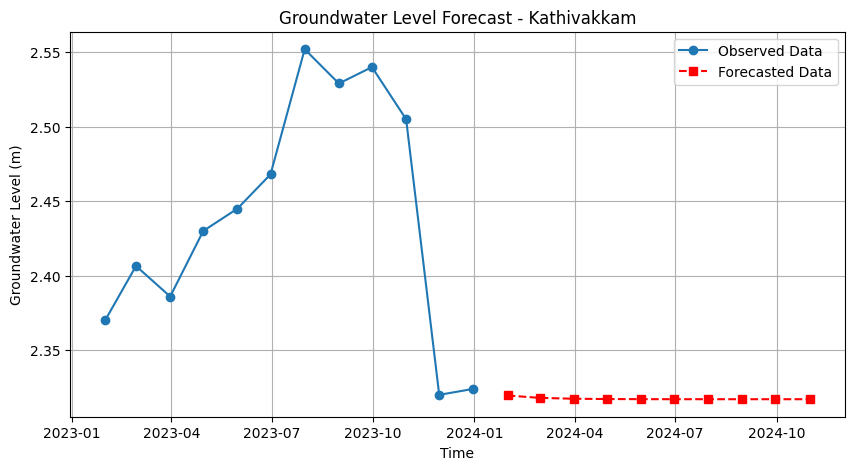

In [32]:
# Plot forecasted values
plt.figure(figsize=(10, 5))
plt.plot(df_location, marker="o", label="Observed Data")
plt.plot(future_dates, forecast, marker="s", linestyle="dashed", color="red", label="Forecasted Data")
plt.xlabel("Time")
plt.ylabel("Groundwater Level (m)")
plt.title(f"Groundwater Level Forecast - {location}")
plt.legend()
plt.grid()
plt.show()

🔍 What This Code Does:
1. ✅ Loads & Prepares Data: Converts Chennai’s groundwater levels into a time-series format.
2. ✅ Trains ARIMA Model: Fits an ARIMA (1,1,1) model to historical data.
3. ✅ Forecasts Next 6 Months: Predicts groundwater levels for the next half-year.
4. ✅ Plots Observed vs. Forecasted Data: Visualizes trends & future projections.
5. ✅ Prints Predicted Values: Provides actionable insights for planning.